# Le-Net 1 based architecture

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as lin
import scipy.signal as sig
from PIL import Image
import glob
import matplotlib.cm as cm

In [37]:
########### Load Input ############################################################################################################################
# In this script I used the brightness to determine structures, instead of one RGB color:
# this is determined by: 0.2126*R + 0.7152*G + 0.0722*B
# Source: https://en.wikipedia.org/wiki/Relative_luminance

patchSize=41 # patchsize this must be 48 since our network can only handle this value

# Open forest
Amount_data= len(glob.glob('Forest/F*'))
dataPatchedF=[]
for k in range (0, Amount_data):
    name="Forest/F%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data= np.asarray( data, dtype="int32" )
    data=0.2126*data[:,:,0]+0.7152*data[:,:,1]+0.0722*data[:,:,2]
    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    dataPatchedF.append(np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize] for i in range(0,Xamount)] for j in range(0,Yamount)]))

# Open city
Amount_data= len(glob.glob('City/C*'))
dataPatchedC=[]
for k in range (0, Amount_data):
    name="City/C%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data = np.asarray( data, dtype="int32" )
    data=0.2126*data[:,:,0]+0.7152*data[:,:,1]+0.0722*data[:,:,2]
    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture    
    dataPatchedC.append(np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize] for i in range(0,Xamount)] for j in range(0,Yamount)]))

# Open water
dataPatchedW=[]
Amount_data= len(glob.glob('Water/W*'))
for k in range (0, Amount_data): 
    name="Water/W%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data = np.asarray( data, dtype="int32" )
    data=0.2126*data[:,:,0]+0.7152*data[:,:,1]+0.0722*data[:,:,2]
    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    dataPatchedW.append(np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize] for i in range(0,Xamount)] for j in range(0,Yamount)])) 
    

In [38]:
########### Functions ############################################################################################################################

# Define Activitation functions, pooling and convolution functions (the rules)

def Sigmoid(x): 
    return (1/(1+np.exp(-x)))

def Pool(I,W):
    PoolImg=np.zeros((len(I)/len(W),len(I)/len(W))) # W must fit an integer times into I.
    for i in range(0,len(PoolImg)):
        for j in range(0,len(PoolImg)):
            SelAr=I[i*len(W):(i+1)*len(W),j*len(W):(j+1)*len(W)]
            PoolImg[i,j]=np.inner(SelAr.flatten(),W.flatten()) # Now this is just an inner product since we have vectors
    return PoolImg

# To automatically make Gaussian kernels
def makeGaussian(size, fwhm = 3, center=None):
    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

# To automatically define pooling nodes
def Pool_node(N):
    s=(N,N)
    
    return np.ones(s)

In [52]:
#################### Define pooling layers ################################################################################################
P12=Pool_node(3)
P34=Pool_node(2) 

#################### Define Convolution layers ################################################################################################


######### First C layer #########
C1=[]

## First Kernel

# Inspiration: http://en.wikipedia.org/wiki/Sobel_operator
# http://stackoverflow.com/questions/9567882/sobel-filter-kernel-of-large-size

Kernel=np.array([[4,3,2,1,0,-1,-2,-3,-4],[5,4,3,2,0,-2,-3,-4,-5], [6,5,4,3,0,-3,-4,-5,-6],[7,6,5,4,0,-4,-5,-6,-7], 
            [8,7,6,5,0,-5,-6,-7,-8],[7,6,5,4,0,-4,-5,-6,-7],[6,5,4,3,0,-3,-4,-5,-6],[5,4,3,2,0,-2,-3,-4,-5],
            [4,3,2,1,0,-1,-2,-3,-4]])

C1.append(Kernel)

## Second Kernel
Kernel=np.matrix.transpose(Kernel)
C1.append(Kernel)

## Third Kernel
Kernel=makeGaussian(9,4)
C1.append(Kernel)

## Fourth Kernel
Kernel=makeGaussian(9,1)
C1.append(Kernel)

######### Second C layer #########

# Initialisation, since this layer should be trained!
C2=[]
# Define the number of branches in one row
N_branches=3

for i in range (0, len(C1)):
    Kernel=np.random.rand(N_branches,4,4) 
    C2.append(Kernel)



#x.append([])
#x[0].append([])
#x[0][0].append(value1)


#A=np.random.rand(3,4,4) 




In [59]:
print len(C2)
print len(C2[0])
print C2[0][1]

4
3
[[ 0.92079595  0.75793952  0.86555843  0.39382498]
 [ 0.78275931  0.45944167  0.04646607  0.47213706]
 [ 0.14463501  0.87558619  0.09933016  0.33223677]
 [ 0.47244172  0.21337678  0.32171666  0.16784268]]


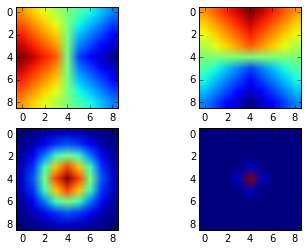

In [45]:
N_plts=len(C1)
for i in range(0,N_plts):
    plt.subplot(2,N_plts/2,i+1)
    plt.imshow(C1[i])    

In [ ]:
# Show several layers

4
